In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,01-01-2004,08-04-2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,01-01-2004,08-04-2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,01-01-2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,01-01-2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,01-01-2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [5]:
df.shape

(90786, 12)

In [6]:
df['AEC_Event Start Date'] = pd.to_datetime(df['AEC_Event Start Date'])

In [7]:
df['CI_Gender'].unique()

array(['Female', 'Not Available', 'Male', 'Unknown', 'Not Reported'],
      dtype=object)

In [8]:
for name in df['CI_Gender'].unique():
    if(name == 'Female'):
        df['CI_Gender'] = df['CI_Gender'].replace(name,0)
    elif(name == 'Male'):
        df['CI_Gender'] = df['CI_Gender'].replace(name,1)
    else:
        df['CI_Gender'] = df['CI_Gender'].replace(name,2)
df = df.replace(' ',np.nan)

In [9]:
df['CI_Gender'].unique()

array([0, 2, 1], dtype=int64)

In [10]:
# df['CI_Gender'] = df['CI_Gender'].replace('Female',0)
# df['CI_Gender'] = df['CI_Gender'].replace('Male',1)



In [11]:
df['AEC_Event Start Date'].replace('', np.nan, inplace=True)
df.dropna(subset=['AEC_Event Start Date'], inplace=True)
df.shape

(53653, 12)

In [12]:
data = df[['AEC_Event Start Date','CI_Gender']]

In [13]:
data.to_csv('q1.csv',index=False)

In [14]:
dt = pd.read_csv('q1.csv')

In [15]:
years = []
for i in range(0,dt['AEC_Event Start Date'].shape[0]):
    date = pd.to_datetime(dt['AEC_Event Start Date'][i])
    date = str(date).split()[0]
    year = pd.to_numeric(date.split('-')[0])
    years.append(year)

In [16]:
dt['years'] = years

In [17]:
dt.head(2)

,AEC_Event Start Date,CI_Gender,years
0,2003-08-04,0,2003
1,2003-08-04,0,2003


In [18]:
data_count_by_year = dt.groupby('years')['CI_Gender'].count()

In [19]:
data_count_by_year = data_count_by_year.to_dict()

In [20]:
# dt = dt[(dt['CI_Gender'].str.contains('0', na=False)) | (dt['CI_Gender'].str.contains('1', na=False))]
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53653 entries, 0 to 53652
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AEC_Event Start Date  53653 non-null  object
 1   CI_Gender             53653 non-null  int64 
 2   years                 53653 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [21]:
dt['CI_Gender'] = pd.to_numeric(dt['CI_Gender'])
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53653 entries, 0 to 53652
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AEC_Event Start Date  53653 non-null  object
 1   CI_Gender             53653 non-null  int64 
 2   years                 53653 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [22]:
dt.index = dt['years']

In [23]:
dt_zeros = dt.where(dt['CI_Gender'] == 0)
dt_ones = dt.where(dt['CI_Gender'] == 1)
dt_unknown = dt.where(dt['CI_Gender'] == 2)

In [24]:
dt_zeros = dt_zeros.dropna()
dt_ones = dt_ones.dropna()
dt_unknown = dt_unknown.dropna()

In [25]:
dt_zeros = dt_zeros.groupby(dt_zeros.index)['CI_Gender'].count()
dt_ones = dt_ones.groupby(dt_ones.index)['CI_Gender'].count()
dt_unknown = dt_unknown.groupby(dt_unknown.index)['CI_Gender'].count()

In [26]:
dt_zeros_female = dt_zeros.to_dict()
dt_ones_male = dt_ones.to_dict()
dt_twos_unknown = dt_unknown.to_dict()

In [27]:
years = []
total_entries = []
male = []
female = []
unknown = []

for key,value in data_count_by_year.items():
    #Female
    if key in dt_zeros_female:
        female.append(dt_zeros_female[key])
    else:
        female.append(0)

    #Male
    if key in dt_ones_male:
        male.append(dt_ones_male[key])
    else:
        male.append(0)

    #Unknown
    if key in dt_twos_unknown:
        unknown.append(dt_twos_unknown[key])
    else:
        unknown.append(0)
    years.append(key)
    total_entries.append(value)


In [71]:
d = {'Years' : years,
    'Male' : male,
    'Female' : female,
    'Unknown' : unknown,
    'Total_entries' : total_entries}
final_df = pd.DataFrame(d)

In [72]:
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return round(percentage,2)

# print(percentage(3, 5))

In [73]:
male_percent_list = []
female_percent_list = []
unknown_percent_list = []
for index, row in final_df.iterrows():
    male_percent = percentage(row['Male'], row['Total_entries'])
    female_percent = percentage(row['Female'], row['Total_entries'])
    unknown_percent = percentage(row['Unknown'], row['Total_entries'])
    
    male_percent_list.append(male_percent)
    female_percent_list.append(female_percent)
    unknown_percent_list.append(unknown_percent)

In [74]:
final_df['Male_percentage'] = male_percent_list
final_df['Female_percentage'] = female_percent_list
final_df['Unknown_percentage'] = unknown_percent_list

In [32]:
# final_df.head(10)

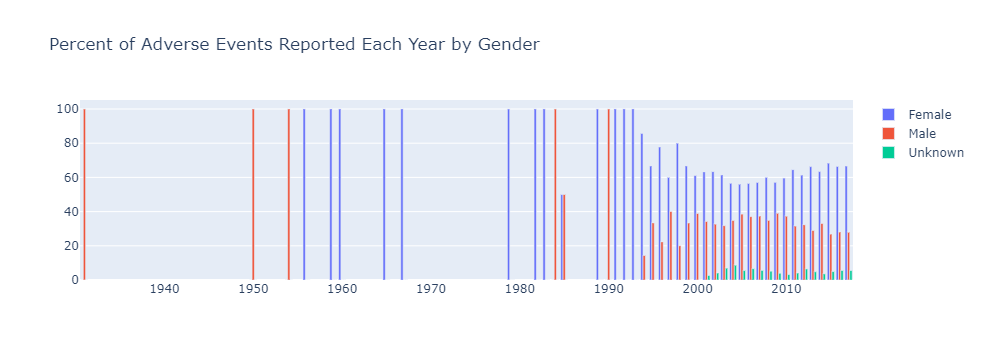

In [75]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Female', x=final_df.Years, y=final_df.Female_percentage),
    go.Bar(name='Male', x=final_df.Years, y=final_df.Male_percentage),
    go.Bar(name='Unknown', x=final_df.Years, y=final_df.Unknown_percentage)],
    layout=go.Layout(
        title=go.layout.Title(text="Percent of Adverse Events Reported Each Year by Gender")))

# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [76]:
Count_list = [final_df.Female.sum(),final_df.Male.sum(),final_df.Unknown.sum()]
Name = ['Female','Male','Unknown']
# print(final_df.Female.sum())
# print(final_df.Male.sum())
# print(final_df.Unknown.sum())
Count_list

[33665, 17311, 2677]

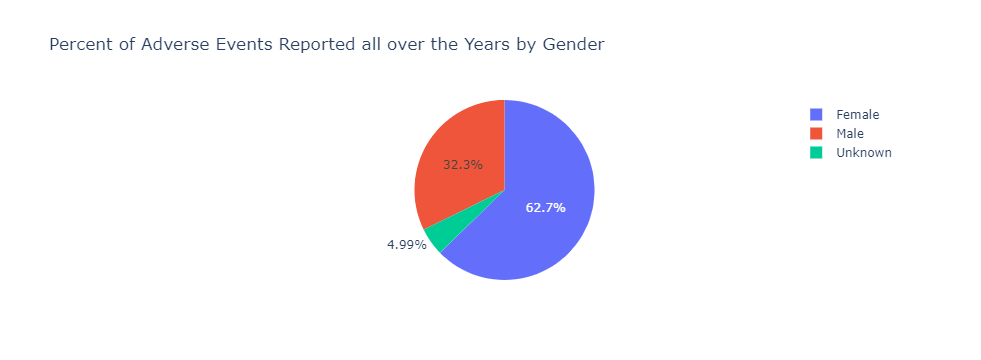

In [77]:
import plotly.express as px
fig = px.pie(final_df,names=Name,values=Count_list,title='Percent of Adverse Events Reported all over the Years by Gender')
fig.show()

In [67]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [52]:
app = dash.Dash(__name__)

In [78]:
header_style = {
    'text-align' : 'center',
    'font-family' : 'sans-serif',
    'font-size' : '24px'    
}

In [88]:
app.layout = html.Div([
    html.H2(children = 'Q1. Percent of Adverse Events Reported Each Year by Gender',
           style = {
               'text-align' : header_style['text-align'],
               'font-family' : header_style['font-family'],
               'font-size' : header_style['font-size']
           }),
    html.Div(
        className='bargraph',
        children = [
    html.Div([
        html.H3(children='Percent of records available by gender over the years'),
        
        dcc.Graph(
            id='q1_bar',
            figure = {
                'data': [
                    {'x': final_df.Years, 'y': final_df.Male_percentage, 'type': 'bar', 'name': 'Male'},
                    {'x': final_df.Years, 'y': final_df.Female_percentage, 'type': 'bar', 'name': 'Female'},
                    {'x': final_df.Years, 'y': final_df.Unknown_percentage, 'type': 'bar', 'name': 'Unknown'}
            ]}),
    ])
            ])
])

app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [39]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px

# # This dataframe has 244 lines, but 4 distinct values for `day`
# df = px.data.tips()

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.P("Names:"),
#     dcc.Dropdown(
#         id='names', 
#         value='day', 
#         options=[{'value': x, 'label': x} 
#                  for x in ['smoker', 'day', 'time', 'sex']],
#         clearable=False
#     ),
#     html.P("Values:"),
#     dcc.Dropdown(
#         id='values', 
#         value='total_bill', 
#         options=[{'value': x, 'label': x} 
#                  for x in ['total_bill', 'tip', 'size']],
#         clearable=False
#     ),
#     dcc.Graph(id="pie-chart"),
# ])

# @app.callback(
#     Output("pie-chart", "figure"), 
#     [Input("names", "value"), 
#      Input("values", "value")])
# def generate_chart(names, values):
#     fig = px.pie(df, values=values, names=names)
#     return fig

# app.run_server(debug=False)

In [40]:
# plt.figure(figsize=(10,30))
# final_df.plot('Years',['Male_percentage','Female_percentage'],kind='bar')
# plt.show()

In [41]:
# from bokeh.plotting import figure, show
# from bokeh.models import DatetimeTickFormatter

In [42]:
# p = figure(title="Simple line example", x_axis_label= 'Years', y_axis_label='Percentage')
# p.width = 1000
# p.height = 1000
# p.sizing_mode = 'stretch_both'
# p.xgrid.grid_line_color = "red"
# p.line(final_df.Years, final_df.Male_percentage, legend_label="Percentage of Male", line_width=2,line_color='red')
# p.line(final_df.Years, final_df.Female_percentage, legend_label="Percentage of Females", line_width=2,line_color='blue')
# p.circle(final_df.Years, final_df.Male_percentage, legend_label="Objects", line_color="red", size=5,fill_color='red')
# p.vbar(x=final_df.Years, top=final_df.Male_percentage, legend_label="Male", width=0.6, bottom=0, color="red",)
# p.vbar(x=final_df.Years, top=final_df.Female_percentage, legend_label="Female", width=0.5, bottom=0, color="blue")
# p.vbar(x=final_df.Years, top=final_df.Male_percentage, legend_label="Male", width=0.6, bottom=0, color="red",hover_line_color="darkgrey")
# p.xaxis[0].formatter = DatetimeTickFormatter(years=["%Y"])
# show(p)

In [43]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
# import plotly.express as px
# import plotly.graph_objects as go

# df = px.data.tips()
# days = final_df['Years'].unique()

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     dcc.Dropdown(
#         id="dropdown",
#         options=[{"label": x, "value": x} for x in final_df['Years']],
#         value=final_df['Years'][0],
#         clearable=True,
#     ),
#     dcc.Graph(id="bar-chart"),
# ])

# @app.callback(
#     Output("bar-chart", "figure"), 
#     [Input("dropdown", "value")])
# def update_bar_chart(day):
#     mask = df["day"] == day
#     # fig = px.bar(final_df, x="Years", y="Female_percentage", 
#     #              color="Female_percentage", barmode="group")
#     fig = go.Figure(data=[
#     go.Bar(name='Female', x=final_df.Years, y=final_df.Female_percentage),
#     go.Bar(name='Male', x=final_df.Years, y=final_df.Male_percentage)])
#     return fig

# app.run_server(debug=False)